1. Представити початковi данi графiчно.
2. Побудувати модель кластеризацiї згiдно з варiантом.
3. Виконати кластеризацiю даних на основi моделi.
4. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.
5. Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних домiльйона).
6. Побудувати кiлька альтернативних моделей:
• шляхом змiни значень параметрiв основної моделi,
• використати рiзнi функцiї вiдстанi в алгоритмах, де це можна зро-
бити,
• задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть
кластерiв - параметр.

7. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi sklearn.metrics (тiльки метрики згiдно з варiантом): Алгоритм DBSCAN.

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(0) 
n_points_per_cluster = 3000 
C1 = [ -6 , -2] + 0.7* np.random.randn ( n_points_per_cluster, 2 ) 
C2 = [ -2 , 2] + 0.3 * np.random.randn ( n_points_per_cluster , 2 ) 
C3 = [ 1 , -2] + 0.2 * np.random.randn ( n_points_per_cluster , 2 ) 
C4 = [ 4 , -4] + 0.1 * np.random.randn ( n_points_per_cluster , 2 ) 
C5 = [ 5 , 0] + 1.4 * np.random.randn ( n_points_per_cluster , 2 ) 
C6 = [ 5 , 6] + 2.0 * np.random.randn(n_points_per_cluster , 2 ) 
X = np.vstack ( ( C1 , C2 , C3 , C4 , C5 , C6 ) ) 

In [2]:
y_0 = np.array([0]*3000)
y_1 = np.array([1]*3000)
y_2 = np.array([2]*3000)
y_3 = np.array([3]*3000)
y_4 = np.array([4]*3000)
y_5 = np.array([5]*3000)
y = np.concatenate ((y_0, y_1, y_2, y_3, y_4, y_5))

(18000,)

<AxesSubplot:>

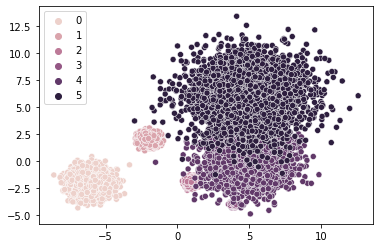

In [3]:
#представлення набору даних
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = y)

In [4]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
data = DBSCAN(eps=0.5, min_samples = 5).fit(X)
labels = data.labels_

In [5]:
def scoring (data, y, X):
    print(f"Estimated number of clusters: {len(np.unique(data.labels_))}")
    print(f"Estimated number of noise points: {list(data.labels_).count(-1)}")
    print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, data.labels_)}")
    print(f"Silhouette Coefficient: {metrics.silhouette_score(X, data.labels_)}")
    print(f"Calinski Harabasz score: {metrics.calinski_harabasz_score(X, data.labels_)}")

In [6]:
#час кластеризації
data.fit(X)

DBSCAN(eps=0.3, min_samples=10)

<AxesSubplot:>

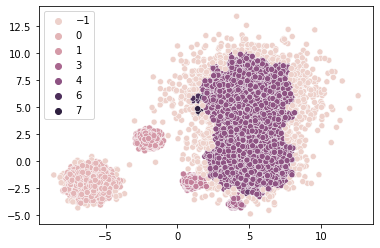

In [7]:
#представлення розбиття по кластерам
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = data.labels_)

In [8]:
scoring (data, y, X)

Estimated number of clusters: 9
Estimated number of noise points: 705
Adjusted Mutual Information: 0.8907804719224578
Silhouette Coefficient: 0.49720699404150015
Calinski Harabasz score: 10173.759287987892


In [9]:
#альтернативна модель 1
data_1 = DBSCAN(eps=0.8, min_samples = 8).fit(X)

In [10]:
scoring (data_1, y, X)

Estimated number of clusters: 9
Estimated number of noise points: 91
Adjusted Mutual Information: 0.6460341309381212
Silhouette Coefficient: 0.35002035796150527
Calinski Harabasz score: 2798.497639622404


<AxesSubplot:>

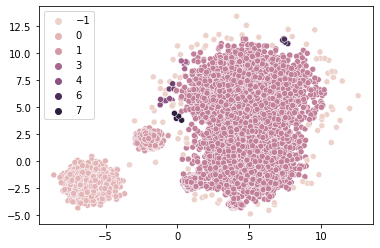

In [11]:
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = data_1.labels_)

In [12]:
#альтернативна модель 2
data_2 = DBSCAN(eps=1, min_samples = 11).fit(X)

In [13]:
scoring (data_2, y, X)

Estimated number of clusters: 4
Estimated number of noise points: 35
Adjusted Mutual Information: 0.6494763500718298
Silhouette Coefficient: 0.4272072098132857
Calinski Harabasz score: 7381.5804616119485


<AxesSubplot:>

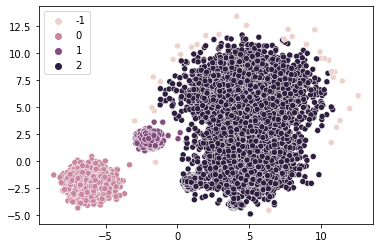

In [14]:
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = data_2.labels_)

Зміна порядку

In [15]:
from sklearn.utils import shuffle

X, y = shuffle(X, y)

In [16]:
clustering = DBSCAN(eps=0.99, min_samples = 29)

In [17]:
clustering.fit(X)

DBSCAN(eps=0.99, min_samples=12)

<AxesSubplot:>

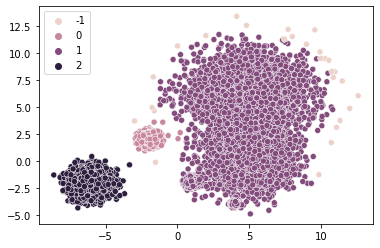

In [18]:
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = clustering.labels_)

In [19]:
scoring(clustering, y, X)

Estimated number of clusters: 4
Estimated number of noise points: 29
Adjusted Mutual Information: 0.649624196539832
Silhouette Coefficient: 0.4260217040181948
Calinski Harabasz score: 7361.149009232618


In [20]:
clustering_1 = DBSCAN(eps=0.1, min_samples = 10)

In [21]:
clustering_1.fit(X)

DBSCAN(eps=1, min_samples=10)

<AxesSubplot:>

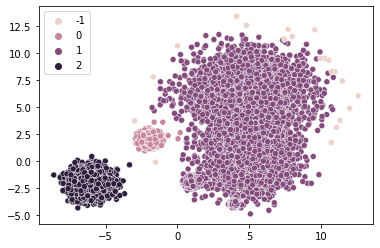

In [22]:
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = clustering_1.labels_)

In [23]:
scoring(clustering_1, y, X)

Estimated number of clusters: 4
Estimated number of noise points: 22
Adjusted Mutual Information: 0.6499338714149508
Silhouette Coefficient: 0.42472859489913445
Calinski Harabasz score: 7342.48984131561


Інший алгоритм

In [27]:
from sklearn.cluster import MeanShift
clustering = MeanShift(n_jobs = -1, bandwidth=2)

In [28]:
clustering.fit(X)

MeanShift(bandwidth=2, n_jobs=-1)

<AxesSubplot:>

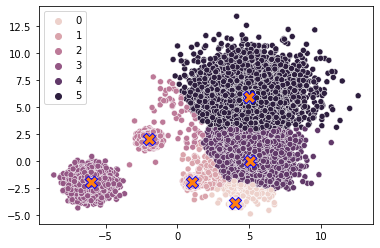

In [31]:
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec = 'blue', marker = 'X')

In [30]:
scoring(clustering, y, X)

Estimated number of clusters: 6
Estimated number of noise points: 0
Adjusted Mutual Information: 0.9210339597544543
Silhouette Coefficient: 0.7210809445937292
Calinski Harabasz score: 52419.67429713986


Висновки:

Метод DBSCAN не справляється з даним набором даних, адже підібрати правильні параметри щоб кластери формувалися правильно неможливо. Навіть після змни об'єктів нічого не змінилося. Однак метод MeanShift підійшов до даних і показав гарні результати.
